In [1]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt                                      # to plot graph
plt.rc("font", size=14)
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns                                                # for intractve graphs
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

**GATHERING DATA**

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
      file.write(response.content)

In [4]:
os.listdir(folder_name)

['image-predictions.tsv']

In [5]:
image_predictions = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True



**3. Twitter API File**

Twitter API file contains tweet id, favorite count and retweet count. Data was provided by Udacity, downloaded manually then will be loaded from the tweet-json.txt file into a pandas data frame

In [6]:
import tweepy

consumer_key = 'XXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
api

tweet_ids = list(archive.tweet_id)
tweet_data = {}
fails_dict = {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))
        fails_dict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fails_dict)

In [8]:
# load twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


**ASSESSING DATA**

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2)
memory usage: 55.2 KB


In [12]:
sum(archive.duplicated())

0

In [13]:
sum(image_predictions.jpg_url.duplicated())

66

In [14]:
sum(twitter_api.duplicated())

1

In [15]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
twitter_api.describe()

,favorites,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


In [18]:
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
archive['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
Toby            7
Bailey          7
an              7
Daisy           7
Bella           6
Rusty           6
Oscar           6
Stanley         6
Dave            6
Koda            6
Leo             6
Jax             6
Jack            6
Scout           6
Milo            6
Gus             5
             ... 
Biden           1
my              1
Bonaparte       1
Buckley         1
Jimbo           1
Eriq            1
Dido            1
Rumpole         1
Rorie           1
Pumpkin         1
Ralphy          1
Maxwell         1
Reptar          1
Major           1
Gilbert         1
Timofy          1
Heinrich        1
Liam            1
Tater           1
Monty           1
Christoper      1
Shnuggles       1
Clarkus         1
Aldrick         1
Bode      

In [20]:
archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

**QUALITY**
### Archive
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_user_id, expanded_url and retweeted_status_timesttamp have missing rows
- timestamp and retweeted_timestamp in object form 
- Correct denominators other than 10.
- Source columns have HTML tags
- drop duplicated rows
- tweet_id is in int type for both Archive and Image_prediction
- Incorrect dog names
- Ratings_numerator
 with decimal values incorrectly extracted
### Image_prediction
- dog breeds inconsistent,contains underscores, and have different case formatting
- the dataset has 2075 entries, while twitter archive dataset has 2356 entries
- rename some columns ( p1, p2, p3,p1_conf,p2_conf,p3_conf, img_num)to improve clarity


## Tidiness
### archive_df table
- the columns doggo, floofer,pupper and puppo are not easy to analyze and should be in one column

### all tables
- All three tables share the column tweet_id and should be merged to archive_df.

## DATA CLEANING

#### Define 
- make a copy of all dataframes with .copy

#### Code

In [22]:
archive_clean = archive.copy()
image_prediction_clean =image_predictions.copy()
tweeter_api_clean = twitter_api.copy()

#### Test

In [23]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [24]:
image_prediction_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [25]:
tweeter_api_clean.head(3)

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328


### Define
- Merge all dataframes
Create a universe dataset joining all the dataframes based on the tweet_id with pd.merge to help save coding time since most of the cleaning 

- Code

In [26]:

archive_clean = pd.merge(archive_clean, tweeter_api_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, image_prediction_clean, how = 'inner', on = 'tweet_id')

### Test

In [27]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
718,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,...,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
519,793180763617361921,NaN,NaN,2016-10-31 20:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793180763...,...,1,Lakeland_terrier,0.266824,True,Irish_terrier,0.218783,True,Airedale,0.132960,True
2028,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,...,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
1359,685325112850124800,NaN,NaN,2016-01-08 05:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Tristan do not speak to me with that kind of ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685325112...,...,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
411,811985624773361665,NaN,NaN,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811985624...,...,1,Staffordshire_bullterrier,0.610573,True,French_bulldog,0.159935,True,doormat,0.058672,False



### Define
- Convert the datatype of "tweet_id" into string

#### Code

In [28]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073


### Define
- Convert the dog stage or category into one column instead of the multiple columns using the pd.melt function

#### Code

In [30]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorites', 'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [31]:
archive_clean = pd.melt(archive_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 
'favorites', 'retweets', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], value_name = 'dog_stage')

#### Test

In [32]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'variable',
 'dog_stage']

In [33]:
archive_clean.drop(['variable'], axis=1,inplace= True)

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 27 columns):
tweet_id                      8292 non-null object
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8292 non-null object
source                        8292 non-null object
text                          8292 non-null object
retweeted_status_id           316 non-null float64
retweeted_status_user_id      316 non-null float64
retweeted_status_timestamp    316 non-null object
expanded_urls                 8292 non-null object
rating_numerator              8292 non-null int64
rating_denominator            8292 non-null int64
name                          8292 non-null object
favorites                     8292 non-null int64
retweets                      8292 non-null int64
jpg_url                       8292 non-null object
img_num                       8292 non-null int64
p1                            8292

#### Define
- Drop all duplicated rows

#### Code

In [35]:
archive_clean = archive_clean.drop_duplicates()

In [36]:
archive_clean.shape

(2406, 27)

In [37]:
archive_clean.tweet_id.duplicated().sum()

333

- we still have some duplicated tweet_id, these duplicated rows might have occured due to multiple tagging of the dog_status. So let us clean the rows with only one dog_status column value.

In [38]:
archive_clean.dog_stage.value_counts()

None       2073
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [39]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2406, 27)

In [40]:

# Selecting the rows with dog_stage with out "None"
dup_tweet_dog_stage_1 = dup_tweet_dog_stage[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_1.shape

(333, 27)

In [41]:
dup_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

733109485275860992    2
801115127852503040    2
802265048156610565    2
854010172552949760    2
785639753186217984    2
Name: tweet_id, dtype: int64

In [42]:

#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
366,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4512,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [43]:

#Checking the multiple rows information with different dog_stage and its text , this will help in analyzing if text can help
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

366     This is Dido. She's playing the lead role in "...
4512    This is Dido. She's playing the lead role in "...
Name: text, dtype: object

- It is better to remove this kind of ambiguity between the dog_stages

In [44]:
# making a bool series 
bool_series = dup_tweet_dog_stage_1["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_1 = dup_tweet_dog_stage_1[~bool_series]

In [45]:
dup_tweet_dog_stage_1.shape

(307, 27)

In [46]:
dup_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [47]:
# Keeping the random row which has dog_stage other than None , it can be any of the dog_stage 
# (Even with valid dog_stage there are duplicates inside it)
dup_tweet_dog_stage_2 = dup_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id'])

In [48]:
dup_tweet_dog_stage_2.shape

(307, 27)

In [49]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)
dup_df_merged.shape

(2060, 27)

In [50]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [51]:
dup_df_merged.dog_stage.value_counts()

None       1753
pupper      210
doggo        67
puppo        23
floofer       7
Name: dog_stage, dtype: int64

In [52]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 7108
Data columns (total 27 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2060 non-null object
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
favorites                     2060 non-null int64
retweets                      2060 non-null int64
jpg_url                       2060 non-null object
img_num                       2060 non-null int64
p1                            2060 no

In [53]:
archive_clean = dup_df_merged.copy()

#### Define

- The timestamp has an incorrect datatype - is an object, should be DateTime

- convert to datetime

#### Code

In [54]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [55]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 0 to 7108
Data columns (total 27 columns):
tweet_id                      2060 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     2060 non-null datetime64[ns]
source                        2060 non-null object
text                          2060 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2060 non-null object
rating_numerator              2060 non-null int64
rating_denominator            2060 non-null int64
name                          2060 non-null object
favorites                     2060 non-null int64
retweets                      2060 non-null int64
jpg_url                       2060 non-null object
img_num                       2060 non-null int64
p1                           

#### Define

Remove in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id',
           retweeted_status_user_id,retweeted_status_timestamp as they contain a lot of null values and will not really be useful if used for the analysis, and also the retweets since it contains rows from retweeted_status_id

#### Code

In [56]:
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]
archive_clean = archive_clean[pd.isnull(archive_clean.in_reply_to_status_id)]

In [57]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp','retweets'], axis = 1, inplace = True)

#### Test

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 7108
Data columns (total 21 columns):
tweet_id              1961 non-null object
timestamp             1961 non-null datetime64[ns]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null int64
rating_denominator    1961 non-null int64
name                  1961 non-null object
favorites             1961 non-null int64
jpg_url               1961 non-null object
img_num               1961 non-null int64
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null bool
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null bool
p3                    1961 non-null object
p3_conf               1961 non-null float64
p3_dog                1961 non-null bool
dog_stage             1961 non-n


### Define

- Dog breeds contain underscores, and have different case formatting

- Replace underscores with whitespace
- Capitalize the first letter of each word

#### Code

In [59]:
# columns with dog breed
dog_breed_cols = ['p1', 'p2', 'p3']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    archive_clean[column] = archive_clean[column].str.replace('_', ' ').str.title()

#### Test

In [60]:
archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1601,675135153782571009,2015-12-11 02:08:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He got locked outside. Damn it...,https://twitter.com/dog_rates/status/675135153...,5,10,Steven,1398,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,...,Stove,0.587507,False,Rotisserie,0.051713,False,Microwave,0.020725,False,None
2043,666411507551481857,2015-11-17 00:24:19,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2,10,quite,459,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,...,Coho,0.404640,False,Barracouta,0.271485,False,Gar,0.189945,False,None
5251,706310011488698368,2016-03-06 02:46:44,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Thinks it's an ai...,https://twitter.com/dog_rates/status/706310011...,12,10,None,23443,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,...,Pembroke,0.698165,True,Chihuahua,0.105834,True,Bloodhound,0.062030,True,pupper


#### Define
- The source column is not giving us any useful information while looking at it. Because the relevant information is always between two "> <", the information will be easy to extract

#### Code

In [61]:
archive_clean.source = archive_clean.source.str.extract("\>(.*?)\<", expand = True)

#### Test

In [62]:
archive_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
13      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
29      Twitter for iPhone
30      Twitter for iPhone
31      Twitter for iPhone
33      Twitter for iPhone
34      Twitter for iPhone
               ...        
5853    Twitter for iPhone
5859    Twitter for iPhone
5860    Twitter for iPhone
5863    Twitter for iPhone
5870    Twitter for iPhone
5877    Twitter for iPhone
5

#### Define

replacing rating_denominator that are not equal to 10 with 10 since 10 is the only rating denominator

#### Code

In [63]:
rating_denominator = archive_clean.query("rating_denominator != 10")

In [64]:
archive_clean.rating_denominator = archive_clean['rating_denominator'] = 10

#### Test

In [65]:
archive_clean['rating_denominator'].value_counts()

10    1961
Name: rating_denominator, dtype: int64

#### Define

Dog names not corrected

#### Code

In [66]:
pd.set_option('display.max_colwidth', -1)

In [67]:
archive_clean.text

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

#### Code

#### Identifying all dog names that are incomplete and removing them 

In [68]:
mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[mask].name.value_counts().sort_index()

a               55
actually        1 
all             1 
an              6 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            2 
light           1 
my              1 
not             1 
officially      1 
one             4 
quite           3 
space           1 
such            1 
the             7 
this            1 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [69]:
lst = ['infuriating','actually','all', 'just','by','getting', 'his','incredibly', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])

1050    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1433    This is actually a lion. We only rate dogs. For the last time please only send dogs. Thank u.\n12/10 would still pet https://t.co/Pp26dMQxap
Name: text, dtype: object
5088    This is all I want in my life. 12/10 for super sleepy pupper https://t.co/4RlLA5ObMh
Name: text, dtype: object
1741    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5373    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
1463    This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE
Name: text, dtype: object
879     This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X
120

In [70]:
for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'

In [71]:
lst = ['infuriating','actually','all', 'just','by','getting', 'his','incredibly', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


In [72]:
archive_clean['name'] = archive_clean['name'].replace('None', np.nan)

In [73]:
archive_clean.name.dropna()

0       Phineas  
1       Tilly    
2       Archie   
3       Darla    
4       Franklin 
6       Jax      
8       Zoey     
10      Koda     
11      Bruno    
13      Ted      
15      Oliver   
16      Jim      
17      Zeke     
18      Ralphus  
19      Gerald   
20      Jeffrey  
22      Canela   
25      Maya     
26      Mingus   
27      Derek    
29      Waffles  
30      Jimbo    
31      Maisey   
34      Earl     
35      Lola     
36      Kevin    
39      Noah     
40      Bella    
43      Rusty    
45      Stanley  
         ...     
5822    Albert   
5824    Jeffri   
5835    Django   
5838    Eve      
5842    Fletcher 
5845    Schnozz  
5848    Chuckles 
5849    Chet     
5853    Cheryl   
5860    Norman   
5863    Scott    
5870    Jazz     
5877    Rolf     
5883    Opal     
5885    Bubba    
6233    Stuart   
6282    Snoopy   
6299    Sebastian
6327    Shikha   
6536    Pablo    
6568    Oliver   
6667    Diogi    
6678    Loki     
6737    Lily     
6753    Be

#### Test

In [74]:
archive_clean.name.value_counts()

Charlie       11
Cooper        10
Oliver        10
Lucy          10
Penny         9 
Tucker        9 
Winston       8 
Sadie         8 
Daisy         7 
Toby          7 
Lola          7 
Stanley       6 
Jax           6 
Bella         6 
Koda          6 
Bo            6 
Chester       5 
Dave          5 
Buddy         5 
Leo           5 
Milo          5 
Rusty         5 
Scout         5 
Louis         5 
Bailey        5 
Oscar         5 
Jerry         4 
Clarence      4 
Bentley       4 
Chip          4 
             .. 
Jerome        1 
Betty         1 
Dot           1 
Swagger       1 
Tebow         1 
Aldrick       1 
Clarkus       1 
Christoper    1 
Tuck          1 
Dobby         1 
Chesterson    1 
Duchess       1 
Bungalo       1 
Shaggy        1 
Stu           1 
Clarq         1 
Tanner        1 
Emmy          1 
Finnegus      1 
Hector        1 
Pumpkin       1 
Maxwell       1 
Reptar        1 
Major         1 
Gilbert       1 
Roscoe        1 
Heinrich      1 
Rorie         

#### Define

rename some columns ( p1, p2, p3,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf, img_num)to improve clarity

#### Code

In [75]:
archive_clean.rename(columns ={'p1': 'prediction1', 'p2':'prediction2','p3':'prediction3','p1_dog':'1stprediction_isdog','p2_dog':'2ndprediction_isdog','p3_dog':'3rdprediction_isdog', 'p1_conf': 'prediction1_confidence', 'p2_conf': 'prediction2_confidence', 'p3_conf':'prediction3_confidence','img_num':'image_number' }, inplace =True)

In [76]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 7108
Data columns (total 21 columns):
tweet_id                  1961 non-null object
timestamp                 1961 non-null datetime64[ns]
source                    1961 non-null object
text                      1961 non-null object
expanded_urls             1961 non-null object
rating_numerator          1961 non-null int64
rating_denominator        1961 non-null int64
name                      1345 non-null object
favorites                 1961 non-null int64
jpg_url                   1961 non-null object
image_number              1961 non-null int64
prediction1               1961 non-null object
prediction1_confidence    1961 non-null float64
1stprediction_isdog       1961 non-null bool
prediction2               1961 non-null object
prediction2_confidence    1961 non-null float64
2ndprediction_isdog       1961 non-null bool
prediction3               1961 non-null object
prediction3_confidence    1961 non-null float

#### Define

 Clean the denominators that contain decimal extracted to float datatype

#### Code

In [77]:

rating = "(\d+\.\d+\/\d+)"

archive_clean.text.str.extract(rating, expand = True)[0].dropna()

40      13.5/10 
558     9.75/10 
1451    11.26/10
4760    11.27/10
Name: 0, dtype: object

In [78]:
archive_num_clean = archive_clean.text.str.extract(rating, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]
archive_num_clean

40      13.5 
558     9.75 
1451    11.26
4760    11.27
Name: 0, dtype: object

In [79]:
archive_num_clean_index = archive_num_clean.index
archive_num_clean_values = archive_num_clean.values.astype("float64")

In [80]:
#transform the datatypes to float
archive_clean.rating_numerator = archive_clean.rating_numerator.astype("float64")
archive_clean.rating_denominator = archive_clean.rating_denominator.astype("float64")
#impute the data
archive_clean.loc[archive_num_clean_index, "rating_numerator"] = archive_num_clean_values
archive_clean.loc[archive_num_clean_index].rating_numerator

40      13.50
558     9.75 
1451    11.26
4760    11.27
Name: rating_numerator, dtype: float64

#### Test

In [81]:
archive_clean.rating_numerator

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
5       13.0
6       13.0
7       13.0
8       13.0
10      13.0
11      13.0
13      12.0
15      13.0
16      12.0
17      13.0
18      13.0
19      12.0
20      13.0
21      14.0
22      13.0
23      13.0
24      12.0
25      13.0
26      13.0
27      13.0
29      13.0
30      12.0
31      13.0
33      13.0
34      12.0
        ... 
5853    11.0
5859    12.0
5860    6.0 
5863    9.0 
5870    12.0
5877    11.0
5883    9.0 
5885    8.0 
6231    13.0
6233    13.0
6282    13.0
6299    13.0
6327    12.0
6359    13.0
6534    14.0
6536    12.0
6548    13.0
6568    13.0
6667    12.0
6678    12.0
6737    12.0
6753    12.0
6773    13.0
6811    13.0
6972    10.0
6992    11.0
7004    10.0
7066    9.0 
7077    10.0
7108    11.0
Name: rating_numerator, Length: 1961, dtype: float64

Define

change none in dog stage to nan and then drop the nulll row

#### Code

In [82]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('None', np.nan)

In [83]:
archive_clean.dog_stage.dropna()

9       doggo 
38      doggo 
84      doggo 
92      doggo 
101     doggo 
143     doggo 
194     doggo 
199     doggo 
240     doggo 
252     doggo 
262     doggo 
268     doggo 
271     doggo 
272     doggo 
277     doggo 
287     doggo 
288     doggo 
296     doggo 
306     doggo 
307     doggo 
309     doggo 
311     doggo 
338     doggo 
340     doggo 
342     doggo 
350     doggo 
357     doggo 
358     doggo 
391     doggo 
395     doggo 
        ...   
5853    pupper
5859    pupper
5860    pupper
5863    pupper
5870    pupper
5877    pupper
5883    pupper
5885    pupper
6231    puppo 
6233    puppo 
6282    puppo 
6299    puppo 
6327    puppo 
6359    puppo 
6534    puppo 
6536    puppo 
6548    puppo 
6568    puppo 
6667    puppo 
6678    puppo 
6737    puppo 
6753    puppo 
6773    puppo 
6811    puppo 
6972    puppo 
6992    puppo 
7004    puppo 
7066    puppo 
7077    puppo 
7108    puppo 
Name: dog_stage, Length: 293, dtype: object

#### Test

In [84]:
archive_clean.dog_stage.value_counts()

pupper     201
doggo      63 
puppo      22 
floofer    7  
Name: dog_stage, dtype: int64

### Storing, Analyzing, and Visualizing Data for this Project.
#### Storing

In [85]:
archive_clean.to_csv('tweeter_archive_master.csv',index=False)

#### Analysing and Visualizing Data

- What breed wa mostly predicted?

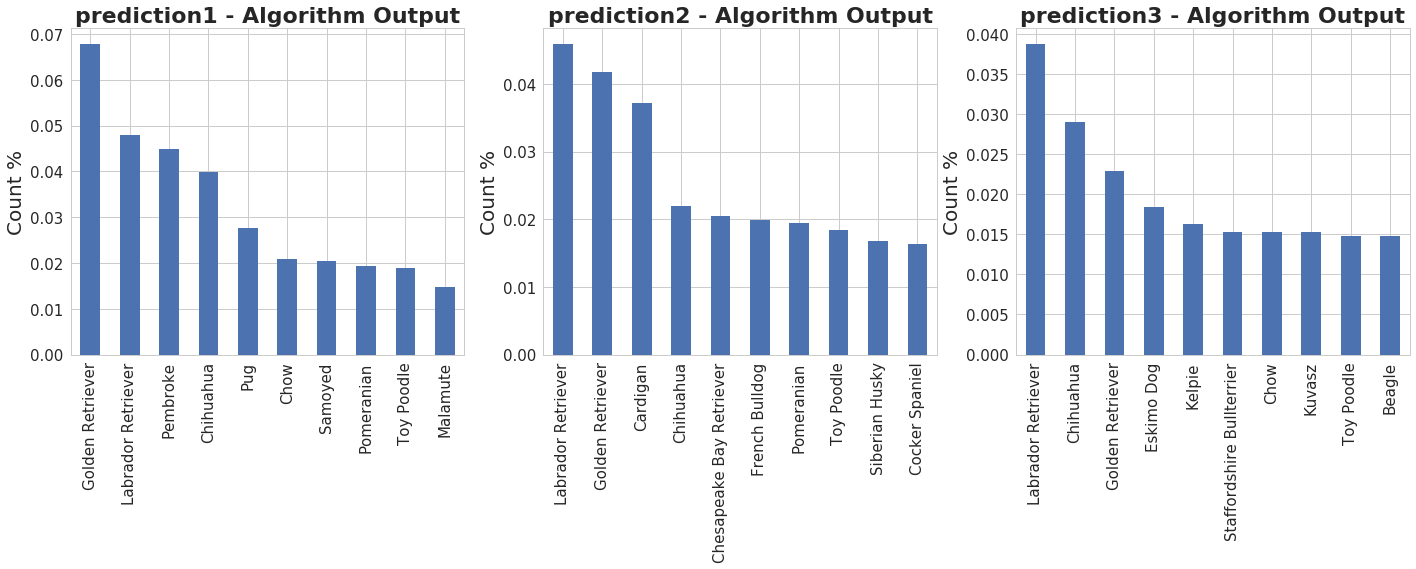

In [86]:
plt.figure(1)
plt.subplot(131)
base_color = sns.color_palette()[0]
archive_clean['prediction1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0, color = base_color)
plt.title('prediction1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['prediction2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0, color = base_color)
plt.title('prediction2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
archive_clean['prediction3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0, color = base_color)
plt.title('prediction3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0);

From the bar chart above, the 3 majorly predicted breeds  were the Labrador Retriever, the Golden Retriever and the Chihuahua dogs 

- what is the most popular dog name?

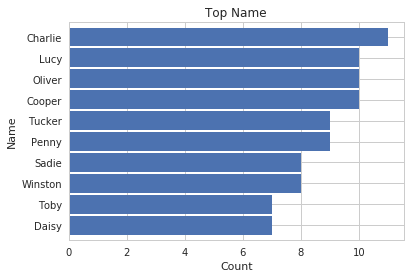

In [87]:
archive_clean.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=base_color)
plt.title('Top Name')
plt.xlabel('Count')
plt.ylabel('Name');

From the above visualization, Charlie is the most popular dog name

What is the most popular dog stage?

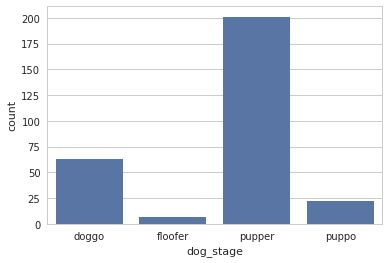

In [88]:
sns.countplot(data = archive_clean, x = 'dog_stage', color = base_color);

From the visualization above, the pupper stage is the most popular dog stage 